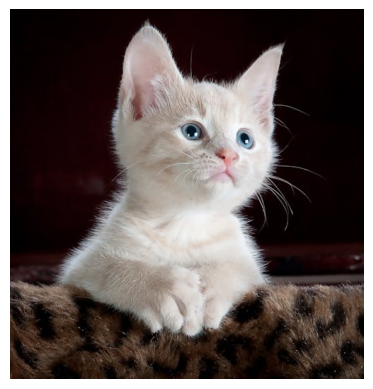

Prediction time: 0.0498 seconds
Predicted Class: Egyptian_cat
Number of parameters: 11.69 million


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import time

# 1. Tải ResNet-18 đã được huấn luyện trước
model = models.resnet18(pretrained=True)
model.eval()  # Chuyển mô hình về chế độ đánh giá

# 2. Tiền xử lý hình ảnh (cùng cách như khi huấn luyện)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 3. Tải hình ảnh và tiền xử lý
url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Hiển thị hình ảnh
plt.imshow(img)
plt.axis('off')  # Tắt trục
plt.show()

# Áp dụng các phép biến đổi
input_tensor = transform(img)
input_batch = input_tensor.unsqueeze(0)  # Thêm một chiều batch

# Kiểm tra nếu có GPU
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

# 4. Dự đoán và đo thời gian
start_time = time.time()  # Thời gian bắt đầu dự đoán
with torch.no_grad():  # Không tính toán gradient trong quá trình đánh giá
    output = model(input_batch)
end_time = time.time()  # Thời gian kết thúc dự đoán

# Thời gian dự đoán
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.4f} seconds")

# 5. Lấy nhãn dự đoán
_, predicted_idx = torch.max(output, 1)

# 6. Tải nhãn lớp ImageNet (nếu cần)
LABELS_URL = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
labels_response = requests.get(LABELS_URL)
labels = labels_response.json()

# 7. In ra nhãn dự đoán
predicted_label = labels[str(predicted_idx.item())]
print(f"Predicted Class: {predicted_label[1]}")

# 8. Số lượng tham số trong mô hình
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {num_params / 1e6:.2f} million")

# 9. Đo độ chính xác (Accuracy) trên tập kiểm tra (nếu bạn có dữ liệu kiểm tra, ví dụ như một batch của tập ImageNet)
# Ví dụ nếu bạn có một tập kiểm tra riêng, bạn có thể đánh giá mô hình và tính toán độ chính xác ở đây.
# Đây là một ví dụ đơn giản cho một batch kiểm tra.
# accuracy = accuracy_at(dataset)  # Tính độ chính xác của mô hình với tập kiểm tra
